## FOOTBALL PLAYER RATING PREDICTOR USING DEEP LEARNING  

STEP1:  GATHERING  AND CLEANING THE DATA


In [1]:
import pandas as pd
import numpy as np

data_url = 'rating_footy.csv'
df = pd.read_csv(data_url)

print(df.isnull().sum())

player_number     0
flag             41
name              0
age               0
position          0
tall              0
weight            0
full_time         0
half_time         0
mins              0
goals             0
asists            0
yel               0
red               0
spg               0
ps_x              0
motm              0
aw                0
rating            0
tackles           0
inter             0
fouls             0
offsides          0
clear             0
drb               0
blocks            0
owng              0
keyp              0
fouled            0
off               0
disp              0
unstch            0
avgp              0
ps_y              0
crosses          31
longb            31
thrb             31
team_name         0
league            0
dtype: int64


In [2]:
df = df.drop(columns=['flag','player_number'])


In [3]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical columns with the median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Explore the updated DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1524 non-null   object 
 1   age        1524 non-null   int64  
 2   position   1524 non-null   object 
 3   tall       1524 non-null   int64  
 4   weight     1524 non-null   int64  
 5   full_time  1524 non-null   int64  
 6   half_time  1524 non-null   int64  
 7   mins       1524 non-null   int64  
 8   goals      1524 non-null   int64  
 9   asists     1524 non-null   int64  
 10  yel        1524 non-null   int64  
 11  red        1524 non-null   int64  
 12  spg        1524 non-null   float64
 13  ps_x       1524 non-null   float64
 14  motm       1524 non-null   int64  
 15  aw         1524 non-null   float64
 16  rating     1524 non-null   float64
 17  tackles    1524 non-null   float64
 18  inter      1524 non-null   float64
 19  fouls      1524 non-null   float64
 20  offsides

positioning players according to fifa standards


In [4]:
import pandas as pd
import re

# Load dataset
file_path = "rating_footy.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Define FIFA standard positions mapping
fifa_positions = {
    "GK": ["GK", "Goalkeeper"],
    "CB": ["D\\(C\\)", "D\\(CL\\)", "D\\(CR\\)", "D\\(CLR\\)", "Defender"],
    "LB": ["D\\(L\\)", "D\\(LR\\)"],
    "RB": ["D\\(R\\)", "D\\(LR\\)"],
    "CM": ["M\\(C\\)", "M\\(CL\\)", "M\\(CR\\)", "M\\(CLR\\)", "Midfielder"],
    "CDM": ["DM\\(C\\)", "DM\\(CL\\)", "DM\\(CR\\)", "DMC"],
    "CAM": ["AM\\(C\\)", "AM\\(CL\\)", "AM\\(CR\\)", "AM\\(CLR\\)"],
    "LM": ["M\\(L\\)", "AM\\(L\\)", "M\\(LM\\)", "M\\(LR\\)"],
    "RM": ["M\\(R\\)", "AM\\(R\\)", "M\\(RM\\)", "M\\(LR\\)"],
    "LW": ["AM\\(L\\)", "F\\(L\\)", "AM\\(LM\\)"],
    "RW": ["AM\\(R\\)", "F\\(R\\)", "AM\\(RM\\)"],
    "ST": ["S\\(C\\)", "FW", "S\\(CL\\)", "S\\(CR\\)", "Forward"],
    "CF": ["F\\(C\\)", "F\\(CL\\)", "F\\(CR\\)"],
}

# Function to standardize positions
def standardize_position(pos):
    standardized_positions = set()
    pos = pos.replace(" ", "")  # Remove spaces for consistency

    for fifa_pos, variations in fifa_positions.items():
        for var in variations:
            if re.search(var, pos):
                standardized_positions.add(fifa_pos)
    
    # Handling specific multi-position cases
    if "AM(LR)" in pos:
        standardized_positions.update(["LW", "RW"])
    if "D(LR)" in pos:
        standardized_positions.update(["LB", "RB"])
    if "M(LR)" in pos:
        standardized_positions.update(["LM", "RM"])
    if "DMC" in pos:
        standardized_positions.add("CDM")
    if "D(CLR)" in pos:
        standardized_positions.add("CB")
    if "M(CLR)" in pos:
        standardized_positions.add("CM")

    return ", ".join(sorted(standardized_positions)) if standardized_positions else "Unknown"

# Add the standard_position column without removing the original position column
df["standard_position"] = df["position"].astype(str).apply(standardize_position)

# Save the updated dataset as pos_fixed_fifa.csv
output_path = "pos_fixed_fifa.csv"
df.to_csv(output_path, index=False)

# Display a preview of the updated DataFrame
print(f"✅ Updated dataset saved as: {output_path}")
print(df.head(10))


✅ Updated dataset saved as: pos_fixed_fifa.csv
   player_number flag                 name  age     position  tall  weight  \
0          40384   it  Giacomo Bonaventura   26      AM(CLR)   181      75   
1          14040   it       Luca Antonelli   29   D(L),M(CL)   184      79   
2          23206   it        Ignazio Abate   29         D(R)   180      73   
3           2533   it    Christian Abbiati   38           GK   191      92   
4          10132   br                 Alex   34         D(C)   188      92   
5          32514   sk          Juraj Kucka   29        M(CL)   186      84   
6           9974   it   Riccardo Montolivo   31         M(C)   181      76   
7           2303   fr       Philippe Mexes   34         D(C)   187      82   
8          58761   sn         M'Baye Niang   21    AM(LR),FW   184      75   
9          14063   co      Cristian Zapata   29         D(C)   186      78   

   full_time  half_time  mins  ...  disp  unstch  avgp  ps_y  crosses  longb  \
0         31  

CALCULATING xG (Expected Goals) and xA (Expected Assists)
 xG (Expected Goals) Calculation
Formula:
xG=(spg×conversion rate)
spg (Shots per Game) → More shots = higher chance of scoring.
Conversion Rate → (Total Goals / Total Shots)
If conversion rate = 0.3, then xG = spg × 0.3
Steps:
Calculate the average conversion rate from the dataset.
Multiply spg by the conversion rate to get xG.
xA (Expected Assists) Calculation
Formula:
xA=(keyp×0.3)+(thrb×0.25)+(longb×0.2)+(avgp×0.15)
keyp (Key Passes) → Most important for assists.
thrb (Through Balls) → Direct chances created.
longb (Long Balls) → Can create assists.
avgp (Average Passes per Game) → General passing contribution.

In [5]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "pos_fixed_fifa.csv"
df = pd.read_csv(file_path)

# Calculate Shots Taken
df["shots_taken"] = df["spg"] * (df["mins"] / 90)

# FIFA position mapping to expected conversion rates
position_conversion = {
    "ST": 0.15, "CF": 0.15, "LW": 0.15, "RW": 0.15,
    "CM": 0.08, "CDM": 0.08, "CAM": 0.08, "LM": 0.08, "RM": 0.08,
    "CB": 0.03, "LB": 0.03, "RB": 0.03,
    "GK": 0.01
}

def map_position_to_conversion(position):
    for pos, patterns in {
        "GK": ["GK", "Goalkeeper"],
        "CB": ["D(C)", "D(CL)", "D(CR)", "D(CLR)", "Defender"],
        "LB": ["D(L)", "D(LR)"],
        "RB": ["D(R)", "D(LR)"],
        "CM": ["M(C)", "M(CL)", "M(CR)", "M(CLR)", "Midfielder"],
        "CDM": ["DM(C)", "DM(CL)", "DM(CR)", "DMC"],
        "CAM": ["AM(C)", "AM(CL)", "AM(CR)", "AM(CLR)"],
        "LM": ["M(L)", "AM(L)", "M(LM)", "M(LR)"],
        "RM": ["M(R)", "AM(R)", "M(RM)", "M(LR)"],
        "LW": ["AM(L)", "F(L)", "AM(LM)"],
        "RW": ["AM(R)", "F(R)", "AM(RM)"],
        "ST": ["S(C)", "FW", "S(CL)", "S(CR)", "Forward"],
        "CF": ["F(C)", "F(CL)", "F(CR)"]
    }.items():
        if any(pattern in position for pattern in patterns):
            return position_conversion[pos]
    return 0.08  # Default to midfielder rate if no match

# Assign expected conversion rates based on FIFA positions
df["expected_conversion_rate"] = df["position"].apply(map_position_to_conversion)

# Recalculate conversion rate and xG
league_avg_conversion = df["goals"].sum() / df["shots_taken"].sum()

df["conversion_rate"] = np.where(
    df["shots_taken"] > 0,
    (0.6 * (df["goals"] / df["shots_taken"])) + (0.4 * df["expected_conversion_rate"]),
    league_avg_conversion
)

# Calculate xG
df["xG"] = df["shots_taken"] * df["conversion_rate"]

# Save updated dataset
updated_file_path = "rating_footy_xg_fifa.csv"
df.to_csv(updated_file_path, index=False)

# Display sample dat

df["xGpg"] = df["xG"] / (df["mins"] / 90)
updated_file_path = "rating_footy_xg_fifa.csv"
print(df[["name", "position", "shots_taken", "goals", "conversion_rate", "xG","xGpg"]].head(10))


                  name     position  shots_taken  goals  conversion_rate  \
0  Giacomo Bonaventura      AM(CLR)   101.013333      6         0.067639   
1       Luca Antonelli   D(L),M(CL)    18.153333      3         0.111155   
2        Ignazio Abate         D(R)     2.504444      1         0.251574   
3    Christian Abbiati           GK     0.000000      0         0.135700   
4                 Alex         D(C)    20.940000      3         0.097960   
5          Juraj Kucka        M(CL)    37.031111      1         0.048203   
6   Riccardo Montolivo         M(C)    26.890000      0         0.032000   
7       Philippe Mexes         D(C)     4.433333      1         0.147338   
8         M'Baye Niang    AM(LR),FW    29.695556      5         0.133025   
9      Cristian Zapata         D(C)     2.966667      1         0.214247   

         xG      xGpg  
0  6.832427  0.216444  
1  2.017840  0.077809  
2  0.630053  0.025157  
3  0.000000  0.000000  
4  2.051280  0.088164  
5  1.784996  0.0771

assists using ml ranfom forest

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
file_path = "rating_footy_xg_fifa.csv"
df = pd.read_csv(file_path)

# Ensure required columns exist
required_xA_cols = ["keyp", "thrb", "longb", "avgp", "crosses", "mins", "asists"]
df = df.dropna(subset=required_xA_cols)

# Convert 'crosses' to per 90 minutes
df["crosses_p90"] = df["crosses"] / (df["mins"] / 90)

# Features for xA calculation
X_xA = df[["keyp", "thrb", "longb", "avgp", "crosses_p90"]]
y_xA = df["asists"]

# Train-Test Split
X_train_xA, X_test_xA, y_train_xA, y_test_xA = train_test_split(X_xA, y_xA, test_size=0.2, random_state=42)

# Random Forest with optimized parameters
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_xA, y_train_xA)
best_model = grid_search.best_estimator_


# Save the best xA model
joblib.dump(best_model, "xA_random_forest_model.pkl")
print("✅ xA model saved as xA_random_forest_model.pkl")

# Predict xA using improved model
df["xA"] = best_model.predict(X_xA)

# Feature Importance Analysis
feature_importance_xA = pd.Series(best_model.feature_importances_, index=X_xA.columns).sort_values(ascending=False)

# Model Evaluation
y_pred_xA = best_model.predict(X_test_xA)
r2 = r2_score(y_test_xA, y_pred_xA)
mae = mean_absolute_error(y_test_xA, y_pred_xA)
mse = mean_squared_error(y_test_xA, y_pred_xA)

# Save updated dataset
updated_file_path = "rating_footy_xg_xa_crosses.csv"
df.to_csv(updated_file_path, index=False)

# Display Results
print("🔎 Feature Importance for xA Calculation:\n", feature_importance_xA)
print(f"\n✅ R² Score: {r2:.3f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.3f}")
print(f"✅ Mean Squared Error (MSE): {mse:.3f}")
print(f"\nUpdated dataset saved as: {updated_file_path}")


df["xApg"] = df["xA"] / (df["mins"] / 90)
print(df[["name","asists","xA","xApg"]].head(10))


✅ xA model saved as xA_random_forest_model.pkl
🔎 Feature Importance for xA Calculation:
 avgp           0.346043
keyp           0.344667
crosses_p90    0.230811
longb          0.042463
thrb           0.036016
dtype: float64

✅ R² Score: 0.631
✅ Mean Absolute Error (MAE): 0.822
✅ Mean Squared Error (MSE): 1.890

Updated dataset saved as: rating_footy_xg_xa_crosses.csv
                  name  asists        xA      xApg
0  Giacomo Bonaventura       8  6.866672  0.217529
1       Luca Antonelli       1  2.164548  0.083466
2        Ignazio Abate       1  2.073811  0.082805
3    Christian Abbiati       0  0.000794  0.001006
4                 Alex       1  0.291513  0.012529
5          Juraj Kucka       3  2.624194  0.113383
6   Riccardo Montolivo       1  2.227834  0.074565
7       Philippe Mexes       0  0.143456  0.032359
8         M'Baye Niang       4  2.273735  0.176107
9      Cristian Zapata       0  0.167738  0.011308


DATA ANALYSIS AND VISUALIZATIONS

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the latest dataset
file_path = "rating_footy_xg_xa_crosses.csv"  # Update with the correct final dataset
df = pd.read_csv(file_path)

# **Drop unnecessary columns**
columns_to_drop = ["player_number", "flag",]  # Adjust based on actual column names
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])





c:\PYTHON ML\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


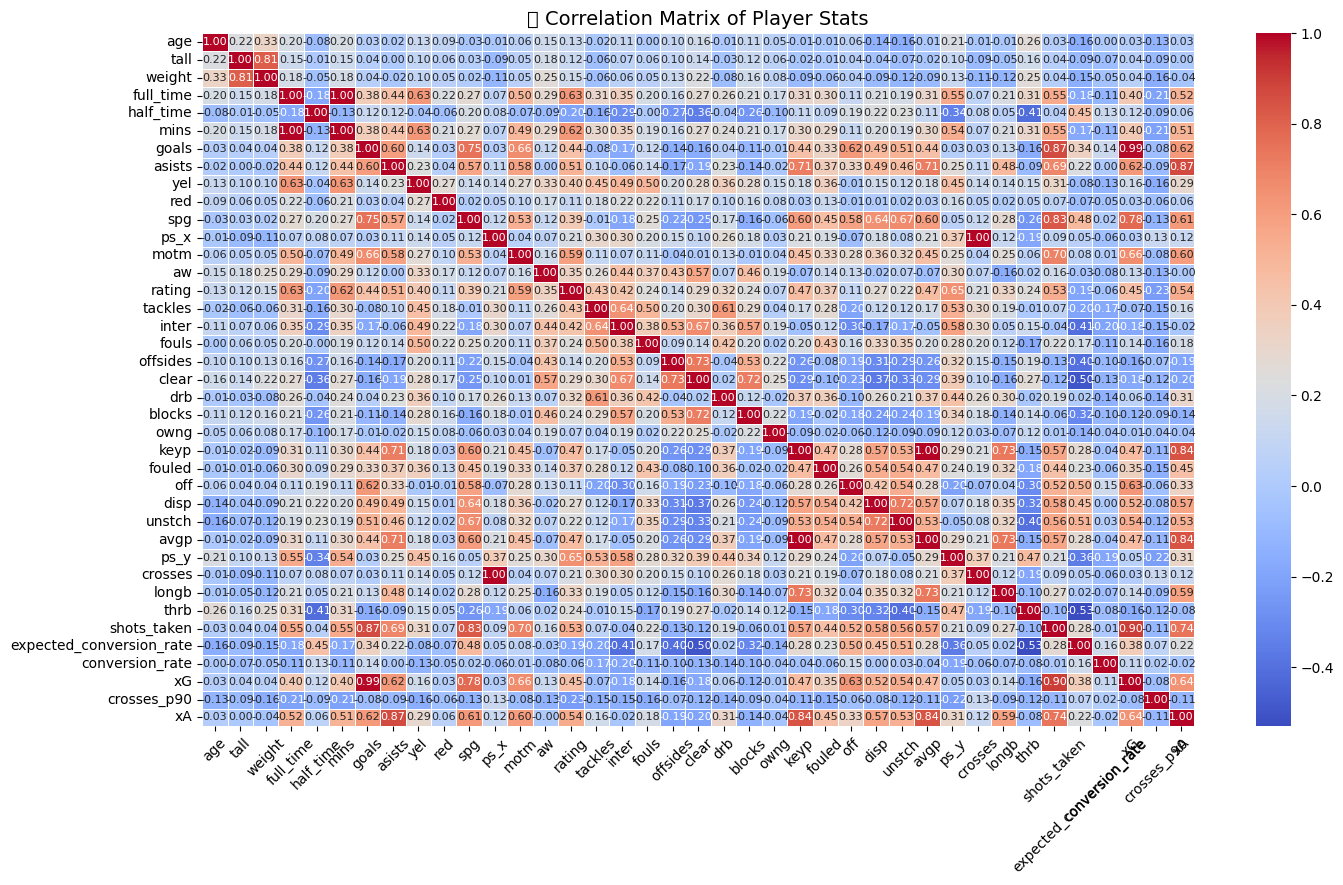

In [8]:
# **1️ Correlation Matrix (Fix: Adjust size & font)**
plt.figure(figsize=(16, 9))  # Increase figure size
numeric_df = df.select_dtypes(include=[np.number])  # Keep only numeric columns

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("🔍 Correlation Matrix of Player Stats", fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.show()

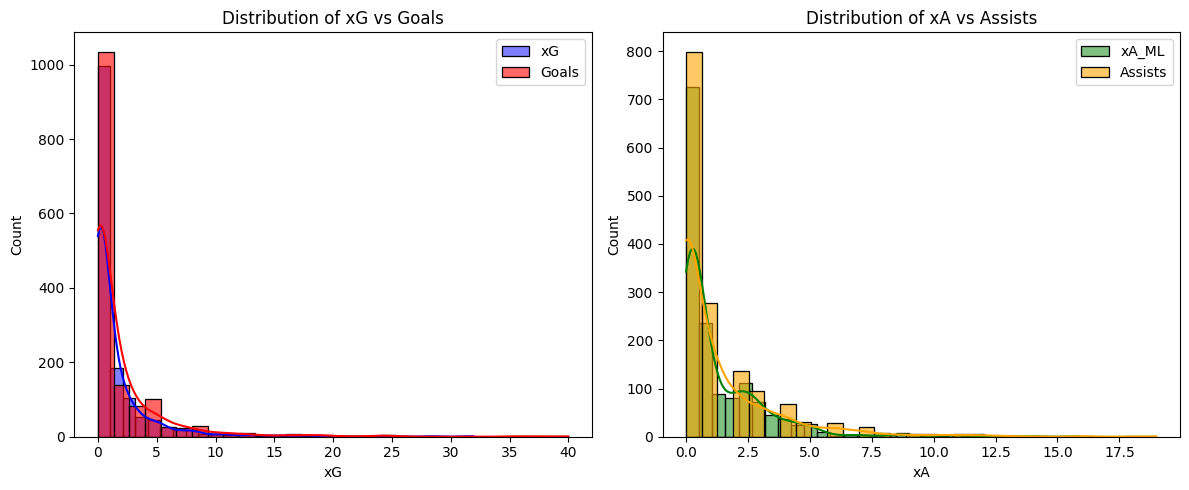

In [9]:
# **2️ Histograms for xG and xA Distributions**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["xG"], bins=30, color="blue", kde=True, label="xG")
sns.histplot(df["goals"], bins=30, color="red", kde=True, alpha=0.6, label="Goals")
plt.legend()
plt.title("Distribution of xG vs Goals")

plt.subplot(1, 2, 2)
sns.histplot(df["xA"], bins=30, color="green", kde=True, label="xA_ML")
sns.histplot(df["asists"], bins=30, color="orange", kde=True, alpha=0.6, label="Assists")
plt.legend()
plt.title("Distribution of xA vs Assists")

plt.tight_layout()
plt.show()

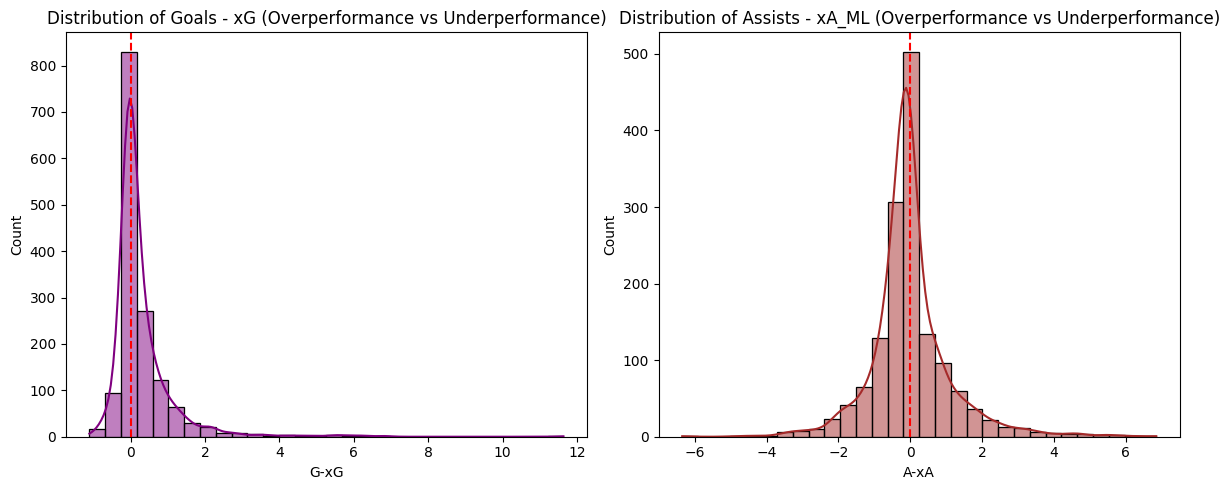

In [10]:

# **4️⃣ Distribution of G - xG and A - xA_ML (Overperformance vs Underperformance)**
df["G-xG"] = df["goals"] - df["xG"]
df["A-xA"] = df["asists"] -df["xA"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["G-xG"], bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.title("Distribution of Goals - xG (Overperformance vs Underperformance)")

plt.subplot(1, 2, 2)
sns.histplot(df["A-xA"], bins=30, kde=True, color="brown")
plt.axvline(0, color="red", linestyle="dashed")
plt.title("Distribution of Assists - xA_ML (Overperformance vs Underperformance)")

plt.tight_layout()
plt.show()

In [11]:
 # Save Final Dataset (Without Unnecessary Columns)**#
final_file_path = "rating_footy_final.csv"
df.to_csv(final_file_path, index=False)

print(f"\n Final dataset saved as: {final_file_path}")



 Final dataset saved as: rating_footy_final.csv


## CALCULATING ADVANCED STATISTICS FOR PLAYERS

In [12]:
import pandas as pd

# Load dataset
file_path = "rating_footy_final.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Ensure 'mins' column exists before applying calculations
if "mins" in df.columns:
    df["Passes/90"] = df["avgp"] * (df["mins"] / 90)  # Total passes per 90 minutes
    df["KP/90"] = df["keyp"] * (df["mins"] / 90)  # Key Passes per 90
    df["Drb/90"] = df["drb"] * (df["mins"] / 90)  # Dribbles per 90
  


# Save updated dataset
df.to_csv("DLdataset.csv", index=False)

# Display first 10 rows
print(df[["mins", "Passes/90", "KP/90", "Drb/90"]].head(10))



   mins  Passes/90      KP/90     Drb/90
0  2841  66.290000  66.290000  22.096667
1  2334  15.560000  15.560000  15.560000
2  2254  17.531111  17.531111  12.522222
3    71   0.000000   0.000000   0.000000
4  2094   4.653333   4.653333   9.306667
5  2083  23.144444  23.144444  27.773333
6  2689  17.926667  17.926667  29.877778
7   399   0.886667   0.886667   0.886667
8  1162  11.620000  11.620000   7.746667
9  1335   1.483333   1.483333   4.450000


In [13]:
file_path = "DLdataset.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
irrelevant_columns = [
     "ps_x", "ps_y",  
    "off", "disp", "unstch", 
]
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')
print("✅ Cleaned Dataset Overview:")
print(df.info())

# Save cleaned dataset
cleaned_file_path = "DLdataset_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"🚀 Cleaned dataset saved as: {cleaned_file_path}")

✅ Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1493 non-null   object 
 1   age                       1493 non-null   int64  
 2   position                  1493 non-null   object 
 3   tall                      1493 non-null   int64  
 4   weight                    1493 non-null   int64  
 5   full_time                 1493 non-null   int64  
 6   half_time                 1493 non-null   int64  
 7   mins                      1493 non-null   int64  
 8   goals                     1493 non-null   int64  
 9   asists                    1493 non-null   int64  
 10  yel                       1493 non-null   int64  
 11  red                       1493 non-null   int64  
 12  spg                       1493 non-null   float64
 13  motm                      1493 non-

## CORRELATION ANALYSIS

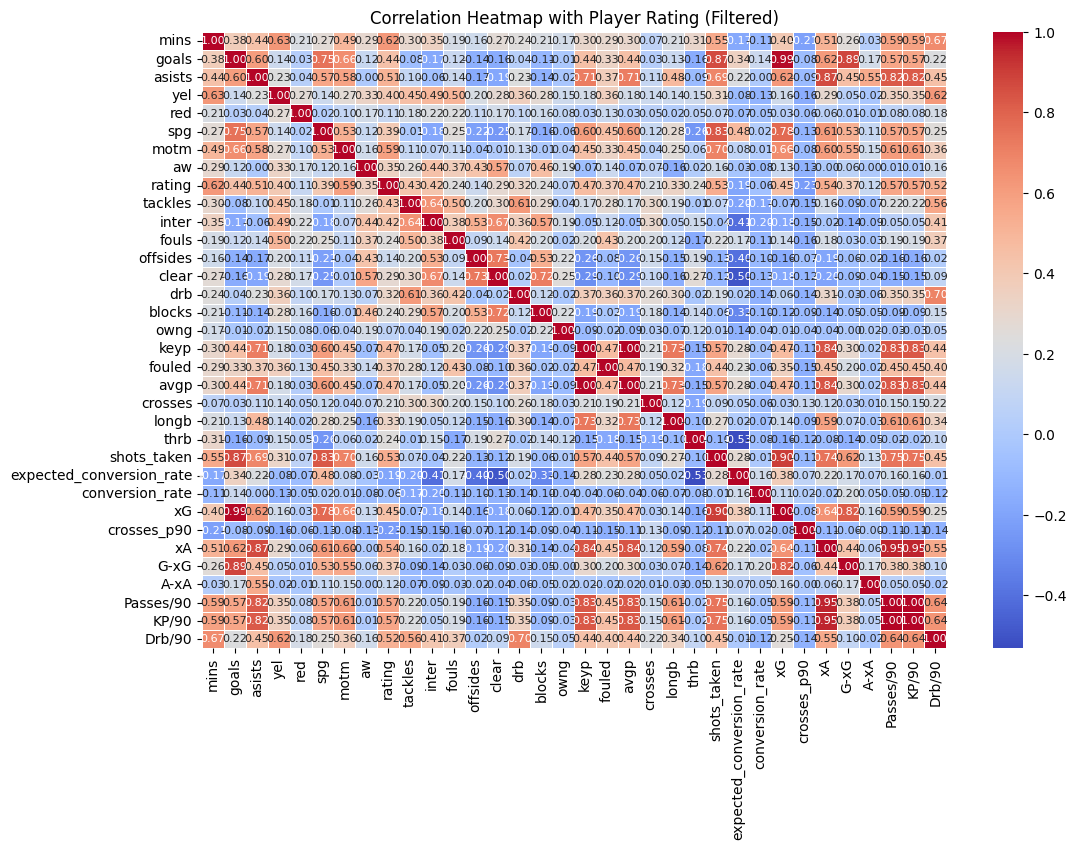

🔎 Correlation with Player Rating (Filtered Dataset):
 rating                      1.000000
mins                        0.621003
motm                        0.591005
KP/90                       0.569161
Passes/90                   0.569161
xA                          0.544256
shots_taken                 0.534924
Drb/90                      0.516779
asists                      0.513250
avgp                        0.466482
keyp                        0.466482
xG                          0.445204
goals                       0.443837
tackles                     0.431567
inter                       0.424149
yel                         0.397184
spg                         0.394910
G-xG                        0.374613
fouled                      0.368100
aw                          0.346021
longb                       0.329342
drb                         0.315846
clear                       0.288086
thrb                        0.243576
fouls                       0.240912
blocks               

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_cleaned = pd.read_csv("DLdataset_cleaned.csv")

# Drop irrelevant features
irrelevant_features = ['age', 'tall', 'weight', 'full_time', 'half_time']
df_cleaned_filtered = df_cleaned.drop(columns=irrelevant_features)

# Keep only numeric data
df_cleaned_numeric = df_cleaned_filtered.select_dtypes(include=['float64', 'int64'])

# Correlation Analysis
rating_col = 'rating' if 'rating' in df_cleaned_numeric.columns else 'Rating'
corr_cleaned = df_cleaned_numeric.corr()[rating_col].sort_values(ascending=False)

# Visualizing Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap with Player Rating (Filtered)")
plt.show()

# Display key correlations
print("🔎 Correlation with Player Rating (Filtered Dataset):\n", corr_cleaned)



Observations from the improved heatmap:

✅ xG and xA show significant correlation with player ratings, confirming their importance in predicting ratings.
✅ G-xG and A-xA have a lower correlation, but they still provide valuable insights for underperforming/overperforming players.
✅ Traditional stats like assists, goals, and shots_taken are highly correlated, reinforcing their significance.
✅ Features like crosses_p90 and KP/90 also contribute meaningfully.
✅ Non-contributing features like own_goals, interceptions, and blocks have minimal impact on ratings.

## FEATURE IMPORTANCE PER POSITION

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


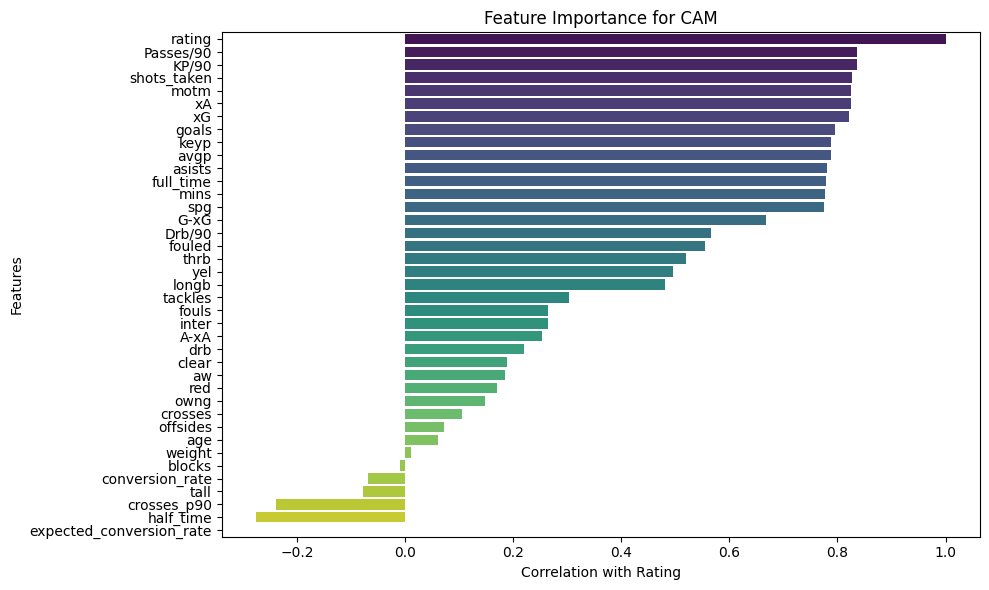

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


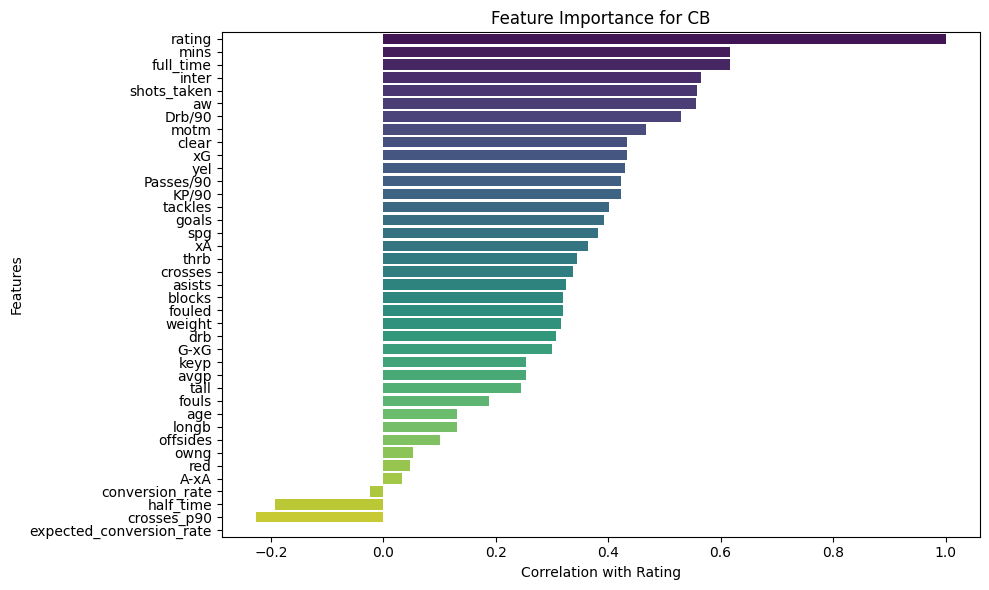

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


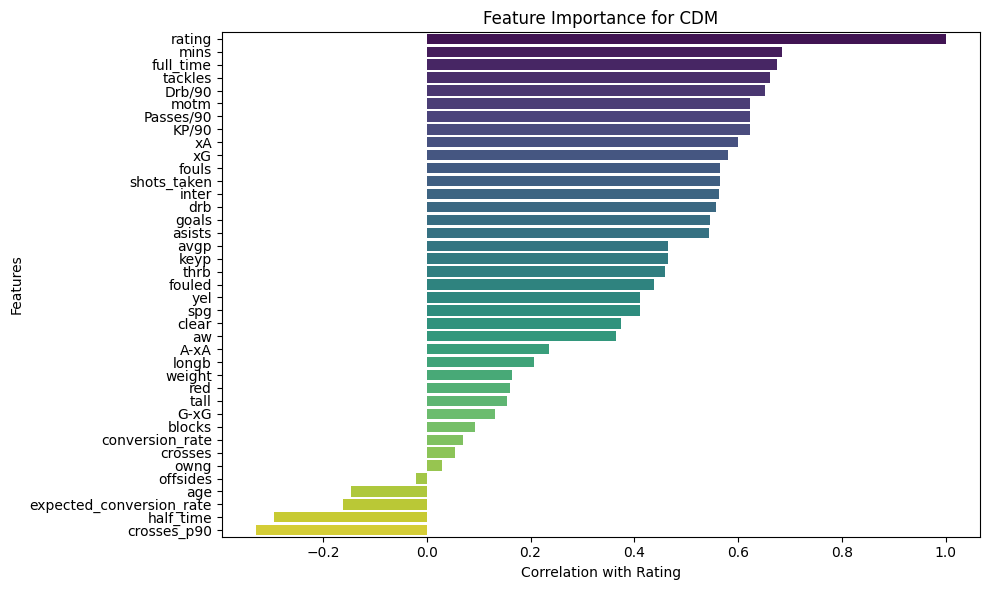

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


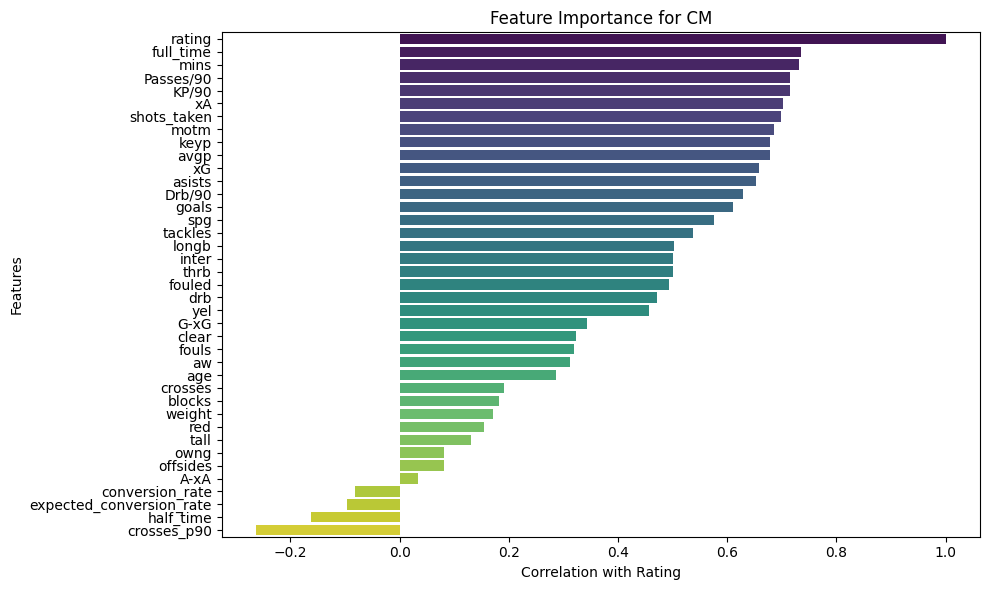

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


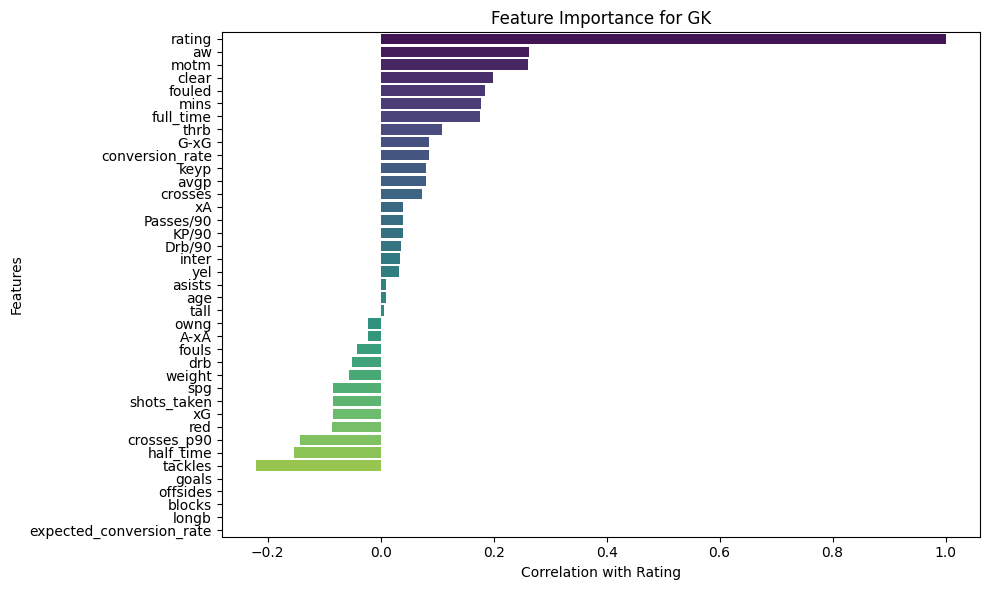

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


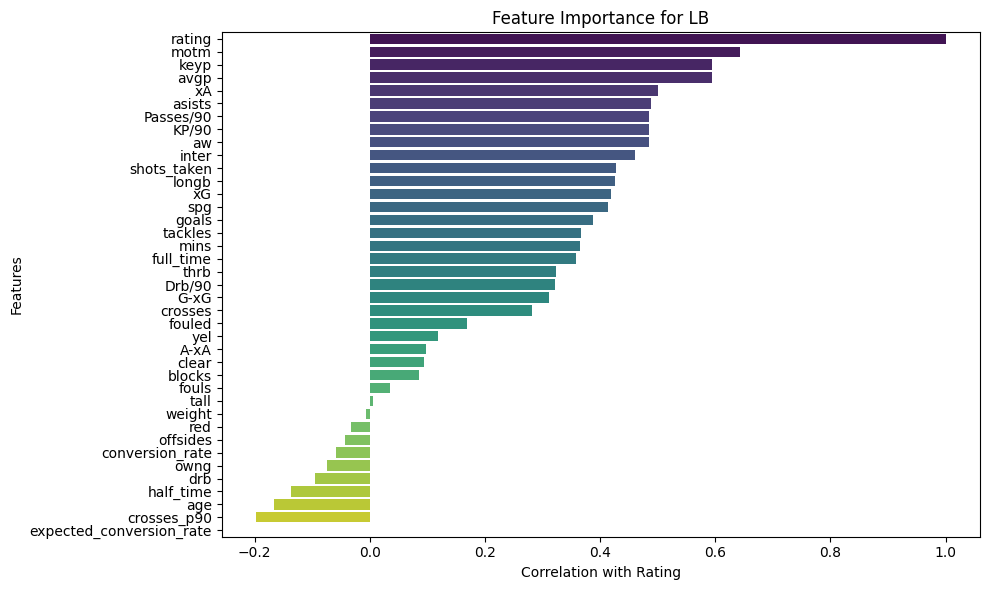

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


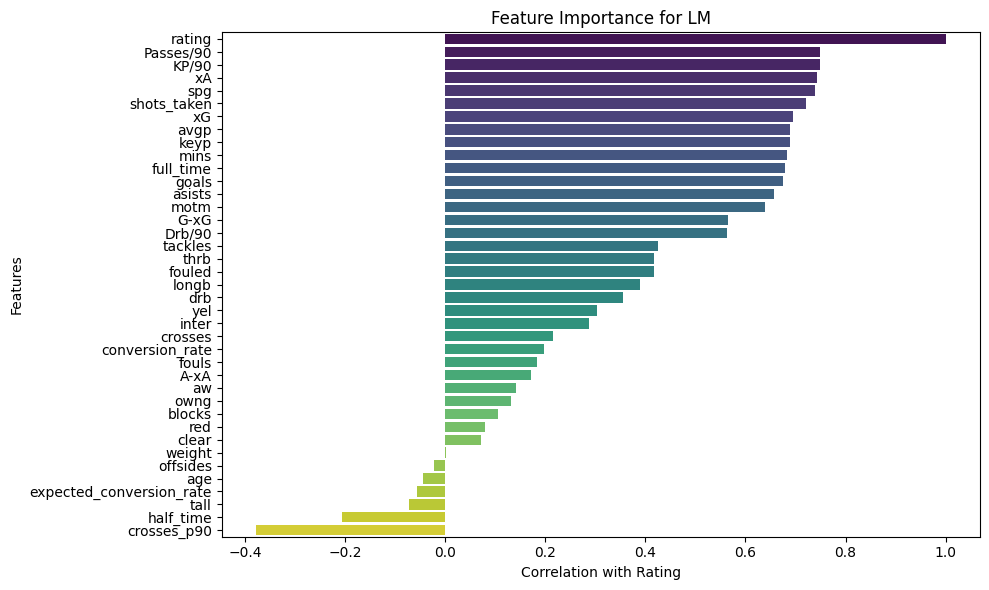

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


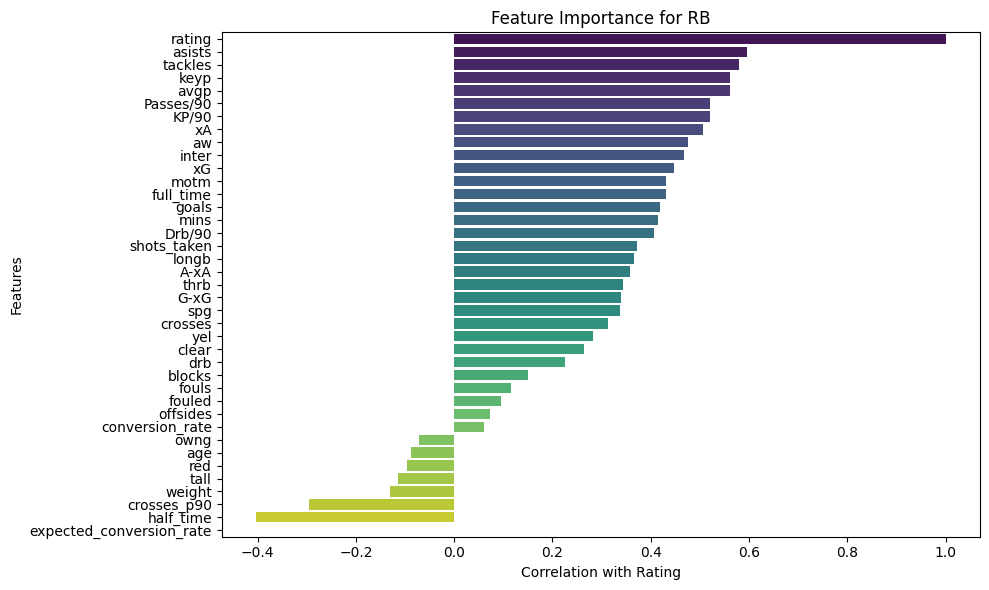

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


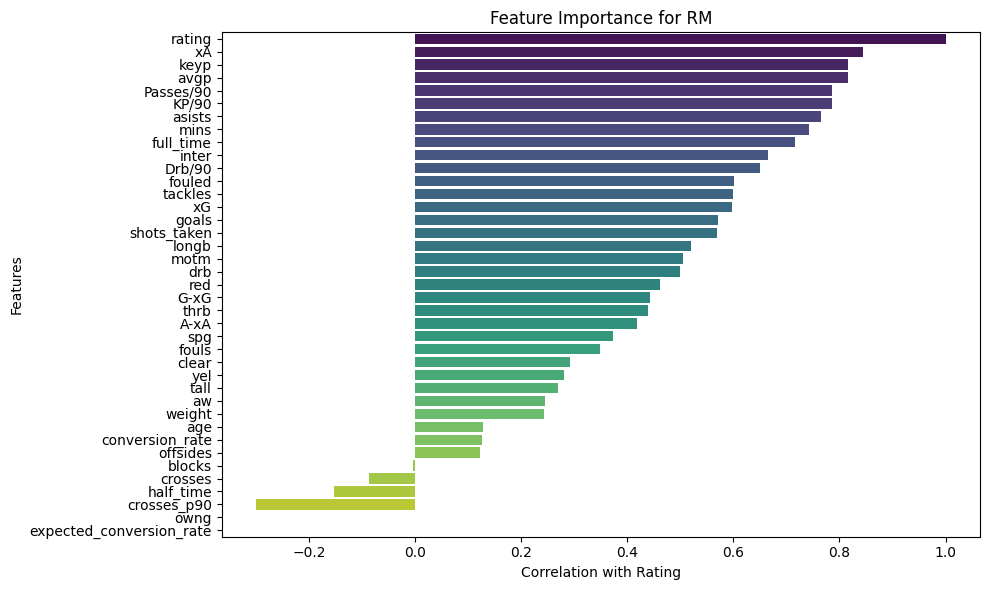

C:\Users\addys\AppData\Local\Temp\ipykernel_10456\2881077690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


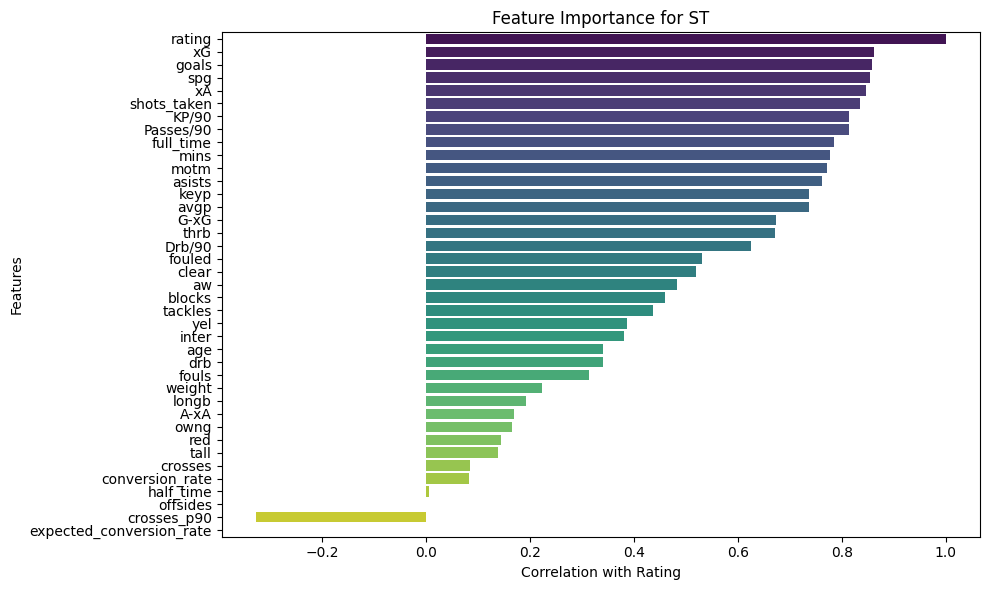

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "DLdataset_cleaned.csv"
df = pd.read_csv(file_path)

# Extract the first assigned position
df['primary_position'] = df['standard_position'].apply(lambda x: x.split(',')[0].strip())

# Group the data by position
position_groups = df.groupby('primary_position')

# Visualizing feature importance for each position
for position, group in position_groups:
    # Drop non-numeric columns for correlation analysis
    numeric_cols = group.select_dtypes(include='number')
    
    if 'rating' in numeric_cols.columns:
        corr = numeric_cols.corr()['rating'].sort_values(ascending=False)
        
        # Visualization
        plt.figure(figsize=(10, 6))
        sns.barplot(x=corr.values, y=corr.index, palette='viridis')
        plt.title(f'Feature Importance for {position}')
        plt.xlabel('Correlation with Rating')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()


In [16]:
import pandas as pd

# Load the dataset
file_path = "DLdataset_cleaned.csv"
df = pd.read_csv(file_path)

# Extract the first assigned position
df['primary_position'] = df['standard_position'].apply(lambda x: x.split(',')[0].strip())

# Function to extract top features for each position
def extract_top_features(position_groups, correlation_threshold=0.4):
    top_features = {}

    for position, group in position_groups:
        # Select numeric columns only
        numeric_cols = group.select_dtypes(include='number')

        if 'rating' in numeric_cols.columns:
            # Filter features with correlation above threshold
            corr = numeric_cols.corr()['rating'].sort_values(ascending=False)
            top_features[position] = list(corr[corr >= correlation_threshold].index)

    # Remove 'rating' itself from the list of features
    for position in top_features:
        if 'rating' in top_features[position]:
            top_features[position].remove('rating')

    return top_features

# Extract top features
top_features_by_position = extract_top_features(df.groupby('primary_position'))

# Display the top features for each position
for position, features in top_features_by_position.items():
    print(f"Top Features for {position}: {', '.join(features)}")
    print("-" * 50)



Top Features for CAM: Passes/90, KP/90, shots_taken, motm, xA, xG, goals, keyp, avgp, asists, full_time, mins, spg, G-xG, Drb/90, fouled, thrb, yel, longb
--------------------------------------------------
Top Features for CB: mins, full_time, inter, shots_taken, aw, Drb/90, motm, clear, xG, yel, Passes/90, KP/90, tackles
--------------------------------------------------
Top Features for CDM: mins, full_time, tackles, Drb/90, motm, Passes/90, KP/90, xA, xG, fouls, shots_taken, inter, drb, goals, asists, avgp, keyp, thrb, fouled, yel, spg
--------------------------------------------------
Top Features for CM: full_time, mins, Passes/90, KP/90, xA, shots_taken, motm, keyp, avgp, xG, asists, Drb/90, goals, spg, tackles, longb, inter, thrb, fouled, drb, yel
--------------------------------------------------
Top Features for GK: 
--------------------------------------------------
Top Features for LB: motm, keyp, avgp, xA, asists, Passes/90, KP/90, aw, inter, shots_taken, longb, xG, spg
---

## CREATING A DATASET BASED ON FEATURE IMPORTANCE FOR EACH POSITION

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
full_df = pd.read_csv("DLdataset_augmented.csv")
full_df["standard_position"] = full_df["standard_position"].astype(str).str.split(",|/").str[0].str.strip()

# Drop rows with missing rating or position
full_df = full_df.dropna(subset=["rating", "standard_position"]).reset_index(drop=True)

# Filter out goalkeepers (GK)
full_df = full_df[full_df["standard_position"] != "GK"].reset_index(drop=True)

# Define input features
all_possible_features = [
    'mins', 'goals', 'asists', 'shots_taken', 'crosses', 'longb', 'thrb',
    'keyp', 'avgp', 'drb', 'spg', 'tackles', 'owng', 'clear', 'inter', 'blocks'
]

# Only keep those features that actually exist in the CSV
basic_input_features = [feat for feat in all_possible_features if feat in full_df.columns]

# Map position to index for embedding
full_df['primary_position'] = full_df['standard_position']
position_to_idx = {pos: i for i, pos in enumerate(sorted(full_df['primary_position'].unique()))}
full_df['position_idx'] = full_df['primary_position'].map(position_to_idx)

# Train/Val split
train_df, val_df = train_test_split(full_df, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
train_df[basic_input_features] = scaler.fit_transform(train_df[basic_input_features])
val_df[basic_input_features] = scaler.transform(val_df[basic_input_features])

# Dataset class with position embedding index
class ScoutingDataset(Dataset):
    def __init__(self, df):
        self.features = df[basic_input_features].values
        self.ratings = df['rating'].values
        self.position_idxs = df['position_idx'].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.ratings[idx], dtype=torch.float32)
        pos_idx = torch.tensor(self.position_idxs[idx], dtype=torch.long)
        return x, y, pos_idx

# Create datasets and loaders
train_dataset = ScoutingDataset(train_df)
val_dataset = ScoutingDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

print(position_to_idx.keys())


dict_keys(['CAM', 'CB', 'CDM', 'CM', 'LB', 'LM', 'RB', 'RM', 'ST'])


## CREATING A POSITION AWARE NEURAL NETWORK MODEL

In [18]:
import torch
import torch.nn as nn

class PositionAwareAttentionModel(nn.Module):
    def __init__(self, input_size, num_positions, hidden_size=128):
        super(PositionAwareAttentionModel, self).__init__()
        self.position_embedding = nn.Embedding(num_positions, input_size)

        # Attention over features per position
        self.attention_layer = nn.Sequential(
            nn.Linear(input_size * 2, input_size),
            nn.Tanh(),
            nn.Linear(input_size, 1)
        )

        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size // 2),
            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, x, pos_idx):
        pos_embed = self.position_embedding(pos_idx)
        x_concat = torch.cat([x, pos_embed], dim=1)

        # Feature-wise attention
        attn_scores = self.attention_layer(x_concat.unsqueeze(1)).squeeze(2)
        attn_weights = torch.softmax(attn_scores, dim=1)
        weighted_x = x * attn_weights

        out = self.encoder(weighted_x)
        return out.squeeze()


## TRAINING

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PositionAwareAttentionModel(input_size=len(basic_input_features), num_positions=len(position_to_idx)).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(300):
    model.train()
    train_losses = []
    for xb, yb, pos in train_loader:
        xb, yb, pos = xb.to(device), yb.to(device), pos.to(device)
        optimizer.zero_grad()
        preds = model(xb, pos)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    model.eval()
    val_losses, all_preds, all_true = [], [], []
    with torch.no_grad():
        for xb, yb, pos in val_loader:
            xb, yb, pos = xb.to(device), yb.to(device), pos.to(device)
            preds = model(xb, pos)
            loss = criterion(preds, yb)
            val_losses.append(loss.item())
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(yb.cpu().numpy())

    if epoch % 50 == 0 or epoch == 299:
        print(f"Epoch {epoch}: Train Loss = {np.mean(train_losses):.4f} | Val Loss = {np.mean(val_losses):.4f}")


Epoch 0: Train Loss = 39.9382 | Val Loss = 28.5757
Epoch 50: Train Loss = 0.0183 | Val Loss = 0.0113
Epoch 100: Train Loss = 0.0146 | Val Loss = 0.0118
Epoch 150: Train Loss = 0.0116 | Val Loss = 0.0083
Epoch 200: Train Loss = 0.0115 | Val Loss = 0.0093
Epoch 250: Train Loss = 0.0102 | Val Loss = 0.0065
Epoch 299: Train Loss = 0.0093 | Val Loss = 0.0064


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score

model.eval()
final_preds, final_true = [], []
with torch.no_grad():
    for xb, yb, pos in val_loader:
        xb, yb, pos = xb.to(device), yb.to(device), pos.to(device)
        preds = model(xb, pos)
        final_preds.extend(preds.cpu().numpy())
        final_true.extend(yb.cpu().numpy())

final_preds_rounded = np.round(final_preds)
final_true_rounded = np.round(final_true)

mse = mean_squared_error(final_true, final_preds)
mae = mean_absolute_error(final_true, final_preds)
r2 = r2_score(final_true, final_preds)
acc = accuracy_score(final_true_rounded, final_preds_rounded)
f1 = f1_score(final_true_rounded, final_preds_rounded, average='weighted')

print("\nFinal Evaluation:")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")
print(f"  Accuracy (rounded): {acc:.4f}")
print(f"  F1 Score (rounded): {f1:.4f}")



Final Evaluation:
  MSE: 0.0065
  MAE: 0.0504
  R²: 0.9568
  Accuracy (rounded): 0.9286
  F1 Score (rounded): 0.9250


## EVALUATION AND VISUALIZATION


Train Metrics:
  MSE: 0.0040
  MAE: 0.0431
  R² Score: 0.9727
  Accuracy (rounded): 0.9423
  F1 Score (rounded): 0.9152


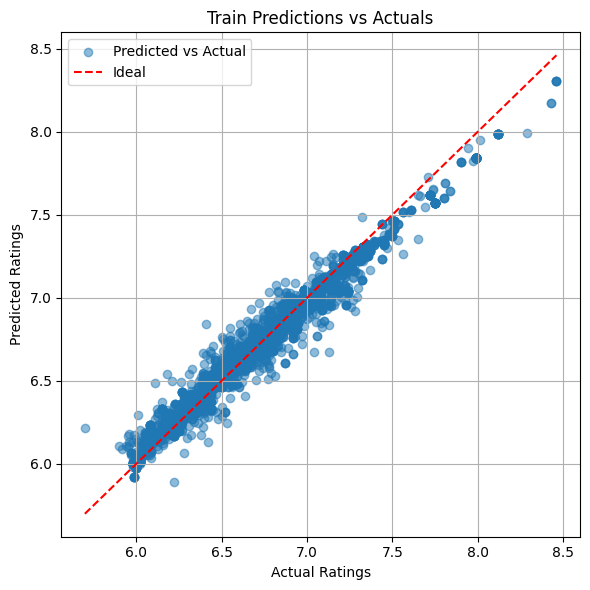

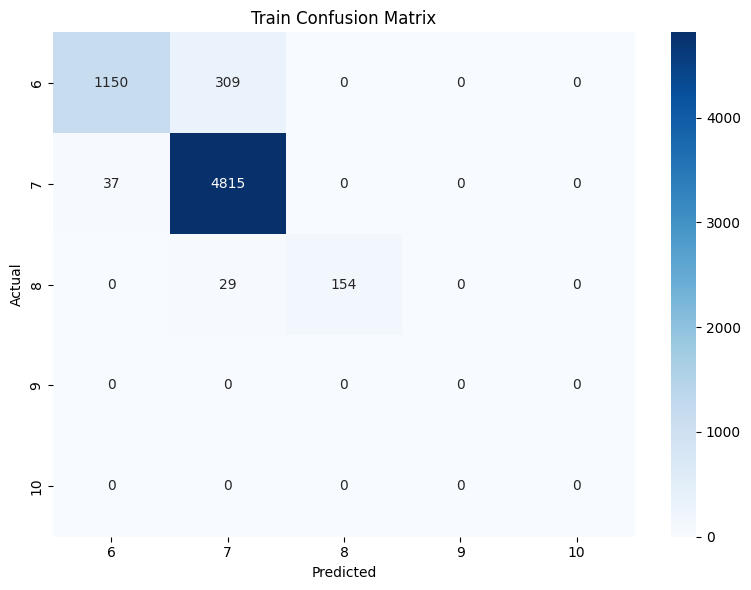


Validation Metrics:
  MSE: 0.0065
  MAE: 0.0504
  R² Score: 0.9568
  Accuracy (rounded): 0.9286
  F1 Score (rounded): 0.6704


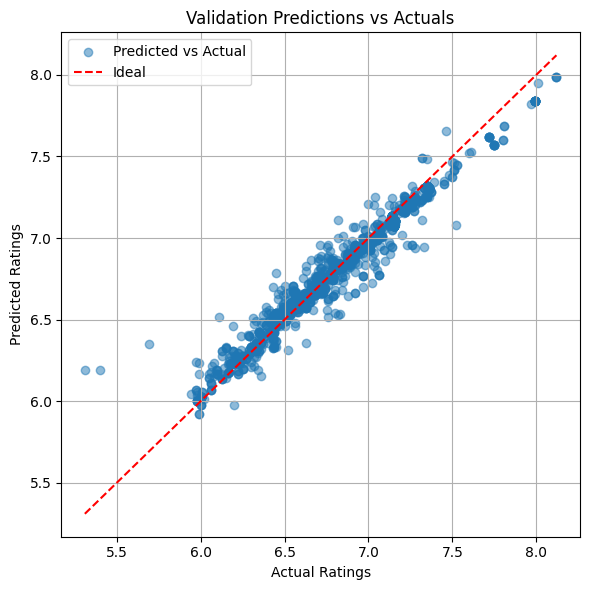

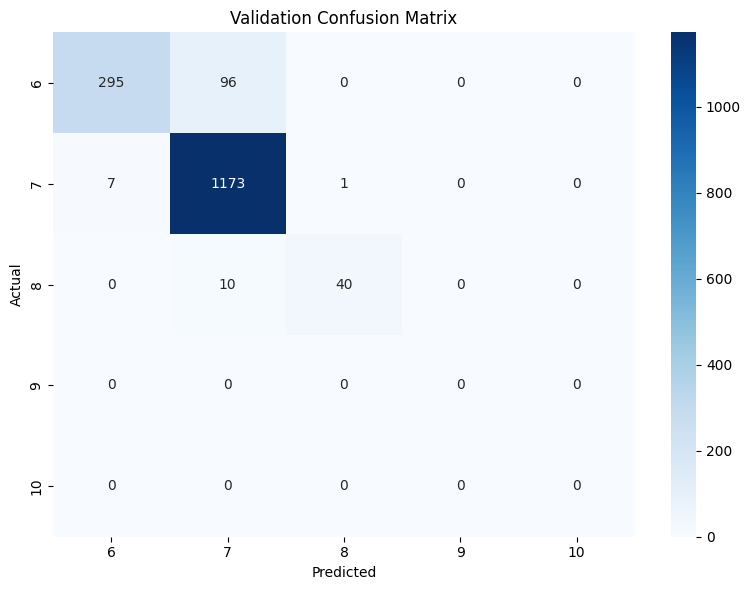

In [32]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score, confusion_matrix

# Function to plot confusion matrix with seaborn
def plot_conf_matrix_seaborn(actuals, predictions, labels=None, name="Validation"):
    rounded_preds = np.round(predictions)
    rounded_actuals = np.round(actuals)
    cm = confusion_matrix(rounded_actuals, rounded_preds, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Main evaluation function
def evaluate_model(model, loader, name="Validation"):
    model.eval()
    actuals = []
    predictions = []

    with torch.no_grad():
        for xb, yb, pos in loader:
            xb, yb, pos = xb.to(device), yb.to(device), pos.to(device)
            preds = model(xb, pos)
            actuals.extend(yb.cpu().numpy())
            predictions.extend(preds.cpu().numpy())

    actuals = np.array(actuals)
    predictions = np.array(predictions)

    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    # Classification-style metrics on rounded values
    rounded_preds = np.round(predictions)
    rounded_actuals = np.round(actuals)
    acc = accuracy_score(rounded_actuals, rounded_preds)
    f1 = f1_score(rounded_actuals, rounded_preds, average='macro')

    # Print metrics
    print(f"\n{name} Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy (rounded): {acc:.4f}")
    print(f"  F1 Score (rounded): {f1:.4f}")

    # Scatter plot of predictions
    plt.figure(figsize=(6,6))
    plt.scatter(actuals, predictions, alpha=0.5, label='Predicted vs Actual')
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', label='Ideal')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title(f'{name} Predictions vs Actuals')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Confusion matrix plot
    plot_conf_matrix_seaborn(actuals, predictions, labels=np.arange(6, 11), name=name)

    return mse, mae, r2, acc, f1

# Call the evaluation
train_metrics = evaluate_model(model, train_loader, name="Train")
val_metrics = evaluate_model(model, val_loader, name="Validation")




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_conf_matrix_seaborn(actuals, predictions, labels=None, name="Validation"):
    rounded_preds = np.round(predictions)
    rounded_actuals = np.round(actuals)

    cm = confusion_matrix(rounded_actuals, rounded_preds, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()


In [22]:
print(basic_input_features)


['mins', 'goals', 'asists', 'shots_taken', 'crosses', 'longb', 'thrb', 'keyp', 'avgp', 'drb', 'spg', 'tackles', 'owng', 'clear', 'inter', 'blocks']


## BUILDING A PREDICTIVE SYSTEM

In [23]:

def predict_rating(player_dict):
    # 1. Normalize input using the same scaler
    input_data = np.array([player_dict[feat] for feat in basic_input_features]).reshape(1, -1)
    input_scaled = scaler.transform(input_data)

    # 2. Convert to torch tensor
    x = torch.tensor(input_scaled, dtype=torch.float32).to(device)

    # 3. Position index
    position = player_dict['position']
    pos_idx = torch.tensor([position_to_idx[position]], dtype=torch.long).to(device)

    # 4. Predict
    model.eval()
    with torch.no_grad():
        pred = model(x, pos_idx)
    return pred.item()




In [24]:

example_player = {
    'position': 'CB',      # Change this to any supported position like 'ST', 'CB', 'RW', etc.

    'mins': 3500,          # Average minutes played per match
    'goals': 0,         # Goals per 90
    'asists': 0,        # Assists per 90
    'shots_taken': 51.0133,    # Shots per 90
    'crosses': 82.2,        # Crosses per 90
    'longb': 3.4,          # Long balls per 90
    'thrb': 6,           # Through balls per 90
    'keyp': 4.1,           # Key passes per 90
    'avgp': 3.1,          # Avg passes per 90
    'drb': 0.7,            # Dribbles per 90
    'spg': 3.2,            # Shots per game
    'tackles': 8.8,        # Tackles per 90
    'owng': 0.00,          # Own goals per 90 (typically 0 or very small)
    'clear': 2.9,          # Clearances per 90
    'inter': 3.2,          # Interceptions per 90
    'blocks': 4.1          # Blocks per 90
}
rating = predict_rating(example_player)
print(f"Predicted rating: {rating:.2f}")


Predicted rating: 9.11


c:\PYTHON ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# After your training loop finishes and you've validated the model:
# (Assuming `model`, `scaler`, and `position_to_idx` are defined)

# ✅ Save the PyTorch model weights
torch.save(model.state_dict(), "rating_model.pth")

# ✅ Save the feature scaler used to normalize inputs
import joblib
joblib.dump(scaler, "feature_scaler.pkl")

# ✅ Save the position-to-index mapping for embeddings
joblib.dump(position_to_idx, "position_to_idx.pkl")

print("✅ All models and mappings saved successfully.")


✅ All models and mappings saved successfully.
